In [1]:
import numpy as np
import sempler
import sempler.generators
import src.utils as utils
import src.metrics as metrics

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec

import pickle
import os


import time

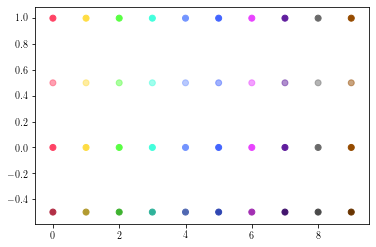

In [2]:
# Set tex formatting for plots
from matplotlib import rc
rc('font',**{'family':'serif','sans-serif':['Computer Modern Roman']})
rc('text', usetex=True)
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Computer Modern Roman"]

# Set legend size
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('medium')

# Colors
def to_rgb(H, b=1, a=1):
    RGBa = []
    for h in H:
        h = h.lstrip("#")
        RGBa.append(tuple(int(h[i:i+2], 16) / 256 * b for i in (0, 2, 4)) + (a,))
    return np.array(RGBa)

cmap = matplotlib.cm.get_cmap('tab20')
# Colorblind safe palettes
base = ['#d73027', '#f46d43', '#fdae61', '#fee090', '#020202', '#abd9e9', '#74add1', '#4575b4']
#base = ['#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac']
#base = ['#8c510a', '#bf812d', '#dfc27d', '#f6e8c3', '#c7eae5', '#80cdc1', '#35978f', '#01665e']
# Rainbow palette
base = ["#ff4365", "#ffdd43", "#59ff43", "#43ffdd", "#7395ff", "#4365ff", "#e943ff", "#601e9e", "#6a6a6a", "#964b00"]#np.array([cmap(i) for i in range(2,20)])
plt.scatter(np.arange(len(base)), np.ones(len(base)), c = base)
#base = [base[i] for i in [0,1,3]]
colors = to_rgb(base)
colorsa = to_rgb(base, a=0.5)
colorsb = to_rgb(base, b=0.7)
plt.scatter(np.arange(len(colors)), np.zeros(len(colors)), c = colors)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*0.5, c = colorsa)
plt.scatter(np.arange(len(colors)), np.ones(len(colors))*-0.5, c = colorsb)

## Load results

In [3]:
directory = "synthetic_experiments/dataset_1661334633_runs:10_seed:42_tag:I3sd_G:100_k:2.7_p:10_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:4_i_type:do_i_size:1_i_v_min:5_i_v_max:10_n:10,100,1000_obs:1_standardize:1/"
directory_raw = "synthetic_experiments/dataset_1661334661_runs:10_seed:42_tag:I3d_G:100_k:2.7_p:10_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:4_i_type:do_i_size:1_i_v_min:5_i_v_max:10_n:10,100,1000_obs:1_standardize:0"

In [4]:
test_cases = utils.read_pickle(directory + 'test_cases.pickle')
test_casesr = utils.read_pickle(directory_raw + 'test_cases.pickle')
Ns = sorted(test_cases['Ns'])

FileNotFoundError: [Errno 2] No such file or directory: 'synthetic_experiments/dataset_1661334661_runs:10_seed:42_tag:I3d_G:100_k:2.7_p:10_w_min:0.5_w_max:1_v_min:1_v_max:2_envs:4_i_type:do_i_size:1_i_v_min:5_i_v_max:10_n:10,100,1000_obs:1_standardize:0test_cases.pickle'

**Varsortability**

In [ ]:
Vs = test_cases['varsortability']
Vs.mean()

In [ ]:
Vr = test_casesr['varsortability']

In [ ]:
Vr.mean(), 

**sortnregress + pool**

In [ ]:
sortp_args, sortp_results = utils.read_pickle(directory + "compiled_results_sortnregress_pool.pickle")
ground_truth, sortp_metrics = utils.read_pickle(directory + "metrics_sortnregress_pool.pickle")
_, sortp_metricsr = utils.read_pickle(directory_raw + "metrics_sortnregress_pool.pickle")

In [ ]:
sortp_metrics[metrics.success_metric].mean(axis=(0,2))

**GnIES**

In [ ]:
gnies_args, gnies_results = utils.read_pickle(directory + "compiled_results_gnies_fb.pickle")
ground_truth, gnies_metrics = utils.read_pickle(directory + "metrics_gnies_fb.pickle")
_, gnies_metricsr = utils.read_pickle(directory_raw + "metrics_gnies_fb.pickle")
gnies_lambdas = gnies_args[2]
gnies_lambdas

In [ ]:
gnies_metrics[metrics.success_metric].mean()

**UT-IGSP**

In [ ]:
ut_igsp_args, ut_igsp_results = utils.read_pickle(directory + "compiled_results_ut_igsp_gauss.pickle")
ground_truth, utigsp_metrics = utils.read_pickle(directory + "metrics_ut_igsp_gauss.pickle")
_, utigsp_metricsr = utils.read_pickle(directory_raw + "metrics_ut_igsp_gauss.pickle")
utigsp_alphas, utigsp_betas = ut_igsp_args[1], ut_igsp_args[2]
utigsp_alphas, utigsp_betas

In [ ]:
utigsp_metrics[metrics.success_metric].mean(axis=(0,1,2,4))

**UT-IGSP+**

In [ ]:
ut_igsp_plus_args, ut_igsp_plus_results = utils.read_pickle(directory + "compiled_results_ut_igsp_plus_gauss.pickle")
ground_truth, utigsp_plus_metrics = utils.read_pickle(directory + "metrics_ut_igsp_plus_gauss.pickle")
_, utigsp_plus_metricsr = utils.read_pickle(directory_raw + "metrics_ut_igsp_plus_gauss.pickle")
utigsp_plus_alphas, utigsp_plus_betas = ut_igsp_args[1], ut_igsp_args[2]
utigsp_plus_alphas, utigsp_plus_betas

In [ ]:
utigsp_plus_metrics[metrics.success_metric].mean()

**GES**

In [ ]:
ges_args, ges_results = utils.read_pickle(directory + "compiled_results_ges.pickle")
ground_truth, ges_metrics = utils.read_pickle(directory + "metrics_ges.pickle")
_, ges_metricsr = utils.read_pickle(directory_raw + "metrics_ges.pickle")
ges_lambdas = ges_args[2]
ges_lambdas

In [ ]:
ges_metrics[metrics.success_metric].mean()

**GES**

In [ ]:
gies_args, gies_results = utils.read_pickle(directory + "compiled_results_gies.pickle")
ground_truth, gies_metrics = utils.read_pickle(directory + "metrics_gies.pickle")
_, gies_metricsr = utils.read_pickle(directory_raw + "metrics_gies.pickle")
gies_lambdas = gies_args[2]
gies_lambdas

In [ ]:
gies_metrics[metrics.success_metric].mean()

**GnIES with rank**

gnies_rank_args, gnies_rank_results = utils.read_pickle(directory + "compiled_results_gnies_rank.pickle")
ground_truth, gnies_rank_metrics = utils.read_pickle(directory + "metrics_gnies_rank.pickle")
gnies_rank_lambdas = gnies_rank_args[2]
gnies_rank_lambdas

gnies_rank_metrics[metrics.success_metric].mean()

In [ ]:
gnies_x = np.nanmean(gnies_metrics[metrics.type_1_structc], axis=(0,3))
gnies_y = np.nanmean(gnies_metrics[metrics.type_2_structc], axis=(0,3))

idx = list(range(len(utigsp_alphas)))
utigsp_x = np.nanmean(utigsp_metrics[metrics.type_1_structc], axis=(0,4))[idx,idx]
utigsp_y = np.nanmean(utigsp_metrics[metrics.type_2_structc], axis=(0,4))[idx,idx]

idx = list(range(len(utigsp_plus_alphas)))
utigsp_plus_x = np.nanmean(utigsp_plus_metrics[metrics.type_1_structc], axis=(0,4))[idx,idx]
utigsp_plus_y = np.nanmean(utigsp_plus_metrics[metrics.type_2_structc], axis=(0,4))[idx,idx]

ges_x = np.nanmean(ges_metrics[metrics.type_1_structc], axis=(0,3))
ges_y = np.nanmean(ges_metrics[metrics.type_2_structc], axis=(0,3))

gies_x = np.nanmean(gies_metrics[metrics.type_1_structc], axis=(0,3))
gies_y = np.nanmean(gies_metrics[metrics.type_2_structc], axis=(0,3))

sort_x = np.nanmean(sort_metrics[metrics.type_1_structc], axis=(0,2))
sort_y = np.nanmean(sort_metrics[metrics.type_2_structc], axis=(0,2))

sortp_x = np.nanmean(sortp_metrics[metrics.type_1_structc], axis=(0,2))
sortp_y = np.nanmean(sortp_metrics[metrics.type_2_structc], axis=(0,2))

In [ ]:
gnies_xr = np.nanmean(gnies_metricsr[metrics.type_1_structc], axis=(0,3))
gnies_yr = np.nanmean(gnies_metricsr[metrics.type_2_structc], axis=(0,3))

idx = list(range(len(utigsp_alphas)))
utigsp_xr = np.nanmean(utigsp_metricsr[metrics.type_1_structc], axis=(0,4))[idx,idx]
utigsp_yr = np.nanmean(utigsp_metricsr[metrics.type_2_structc], axis=(0,4))[idx,idx]

idx = list(range(len(utigsp_plus_alphas)))
utigsp_plus_xr = np.nanmean(utigsp_plus_metricsr[metrics.type_1_structc], axis=(0,4))[idx,idx]
utigsp_plus_yr = np.nanmean(utigsp_plus_metricsr[metrics.type_2_structc], axis=(0,4))[idx,idx]

ges_xr = np.nanmean(ges_metricsr[metrics.type_1_structc], axis=(0,3))
ges_yr = np.nanmean(ges_metricsr[metrics.type_2_structc], axis=(0,3))

gies_xr = np.nanmean(gies_metricsr[metrics.type_1_structc], axis=(0,3))
gies_yr = np.nanmean(gies_metricsr[metrics.type_2_structc], axis=(0,3))

sort_xr = np.nanmean(sort_metricsr[metrics.type_1_structc], axis=(0,2))
sort_yr = np.nanmean(sort_metricsr[metrics.type_2_structc], axis=(0,2))

sortp_xr = np.nanmean(sortp_metricsr[metrics.type_1_structc], axis=(0,2))
sortp_yr = np.nanmean(sortp_metricsr[metrics.type_2_structc], axis=(0,2))

## Figure 2

In [ ]:
text = True
textsize = 5
lineopts = {'linewidth': 1}
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
marker = {'gnies': '.',
          'gnies_rank': '.',
          'gies': 'v',
          'ges': '*',
          'ut_igsp': '^',
          'ut_igsp+': '^',          
          'sortp': 'X',           
}
style = {'gnies': '-',
         'gnies_rank': ':',
         'ges': ':',
         'gies': '--',
         'ut_igsp': ':',
         'ut_igsp+': '--',
         'sort': ':',
         'sortp': '--',
           
}
color = {'gnies': colors[0],
         'gnies_rank': colorsa[0],
         'ges': colors[1],
         'gies': colors[3],
         'ut_igsp': colors[4],
         'ut_igsp+': colors[5],
         'sort': colors[2],
         'sortp': colors[2],
         
}

print_names = {'gnies': 'GnIES',
               #'gnies_rank': 'GnIES-rank',
               'ges': 'GES',
               'gies': 'GIES-Oracle',
               'ut_igsp': 'UT-IGSP',
               'ut_igsp+': 'UT-IGSP+',
               #'sort': 'sortnrgress',         
               'sortp': 'sortnrgress',
}

def plot_metric(ax, values_x, values_y, lambdas, method, points, text, gray=False):
    c = '#aaaaaa' if gray else color[method]
    values_y = 1 - values_y
    ax.plot(values_x, values_y, color=c, linestyle=style[method], **lineopts)
    for j, l in enumerate(lambdas):
        #ax.scatter(values_x[j], values_y[j], color=color[method], marker=".", linewidth=0)
        if j==0 and text[0] is not None:
            if l < 0.001:
                l = np.log10(l)
                fmt = "$10^{%d}$"
            else:
                fmt = "$"+text[0]+"$"
            ax.text(values_x[j], values_y[j], fmt % l, fontsize=textsize, ha="left")
        if l==lambdas[-1] and text[1] is not None:
            ax.text(values_x[j], values_y[j], ("$"+text[1]+"$") % l, fontsize=textsize, ha="left")
        if j in points:
            ax.scatter(values_x[j], values_y[j], color=c, marker=marker[method], linewidth=0)

def set_ax(ax, yticks=True):
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('FDP')    
    ax.set_ylabel('TDP') if yticks else None
    ax.set_yticks(ticks)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks) if yticks else ax.set_yticklabels([])


gs = gridspec.GridSpec(1, 3, wspace=0.10, hspace=0.2)
plt.figure(figsize=(9,3))
ax = plt.gca()

for i,n in enumerate(Ns):
    plt.subplot(gs[i])
    ax = plt.gca()
    if i==0:
        ax0 = ax
    
    # Plot GnIES
    plot_metric(ax, gnies_x[:,i], gnies_y[:,i], gnies_lambdas, 'gnies', [0,2,len(gnies_lambdas)-1], ["%0.1f","%0.1f"])
        
    # Plot UT-IGSP
    plot_metric(ax, utigsp_x[:,i], utigsp_y[:,i], utigsp_alphas, 'ut_igsp', [0,len(utigsp_alphas)-1], ["%0.1f","%0.1f"])

    # Plot UT-IGSP+
    plot_metric(ax, utigsp_plus_x[:,i], utigsp_plus_y[:,i], utigsp_plus_alphas, 'ut_igsp+', [0,len(utigsp_plus_alphas)-1], ["%0.1f" if n!=1000 else None,"%0.1f" if n==10 else None])

    # Plot GES
    plot_metric(ax, ges_x[:,i], ges_y[:,i], ges_lambdas, 'ges', [0,2,len(ges_lambdas)-1], ["%0.1f","%0.1f" if n!= 10 else None])
    
    # Plot GIES
    plot_metric(ax, gies_x[:,i], gies_y[:,i], gies_lambdas, 'gies', [0,2,len(ges_lambdas)-1], ["%0.1f","%0.1f"])# if n!= 1000 else None])
    
    # Plot sortnregress 
    #ax.scatter(sort_x[i], 1-sort_y[i], color=color['sort'], marker=marker['sort'], linewidth=0)
    
    # Plot sortnregress + pool
    ax.scatter(sortp_x[i], 1-sortp_y[i], color=color['sortp'], marker=marker['sortp'], linewidth=0)
    
    set_ax(ax, yticks=i==0)
    ax.set_title("%d obs./environment" % n)


# Build legend
method_entries = [Line2D([0], [0],
                         linewidth=0 if method == 'sortp' else 1,
                         linestyle=style[method],
                         marker=marker[method],
                         color=color[method]) for method in print_names.keys()]
method_str = list(print_names.values())
ax.legend(method_entries, #+ sample_size_entries
          method_str, # + sample_size_str
          prop={'size':8},
          loc='lower left',
        ncol=1)


plt.savefig('figures/figure_mismatch.pdf', bbox_inches='tight')

## Figure 6

In [ ]:
text = True
textsize = 5
lineopts = {'linewidth': 1}
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1]
marker = {'gnies': '.',
          'gnies_rank': '.',
          'gies': 'v',
          'ges': '*',
          'ut_igsp': '^',
          'ut_igsp+': '^',          
          'sortp': 'X',           
}
style = {'gnies': '-',
         'gnies_rank': ':',
         'ges': ':',
         'gies': '--',
         'ut_igsp': ':',
         'ut_igsp+': '--',
         'sort': ':',
         'sortp': '--',
           
}
color = {'gnies': colors[0],
         'gnies_rank': colorsa[0],
         'ges': colors[1],
         'gies': colors[3],
         'ut_igsp': colors[4],
         'ut_igsp+': colors[5],
         'sort': colors[2],
         'sortp': colors[2],
         
}

print_names = {'gnies': 'GnIES',
               #'gnies_rank': 'GnIES-rank',
               'ges': 'GES',
               'gies': 'GIES-Oracle',
               'ut_igsp': 'UT-IGSP',
               'ut_igsp+': 'UT-IGSP+',
               #'sort': 'sortnrgress',         
               'sortp': 'sortnrgress',
}

def plot_metric(ax, values_x, values_y, lambdas, method, points, text, gray=False):
    c = '#aaaaaa' if gray else color[method]
    values_y = 1 - values_y
    ax.plot(values_x, values_y, color=c, linestyle=style[method], **lineopts)
    for j, l in enumerate(lambdas):
        #ax.scatter(values_x[j], values_y[j], color=color[method], marker=".", linewidth=0)
        if j==0 and text[0] is not None:
            ax.text(values_x[j], values_y[j], "$%0.2f$" % l, fontsize=textsize)
        if l==lambdas[-1] and text[1] is not None:
            ax.text(values_x[j], values_y[j], "$%0.2f$" % l, fontsize=textsize)
        if j in points:
            ax.scatter(values_x[j], values_y[j], color=c, marker=marker[method], linewidth=0)

def set_ax(ax, yticks=True):
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel('FDP')    
    ax.set_ylabel('TDP') if yticks else None
    ax.set_yticks(ticks)
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_yticklabels(ticks) if yticks else ax.set_yticklabels([])


gs = gridspec.GridSpec(1, 3, wspace=0.10, hspace=0.2)
plt.figure(figsize=(9,3))
ax = plt.gca()

for i,n in enumerate(Ns):
    plt.subplot(gs[i])
    ax = plt.gca()
    if i==0:
        ax0 = ax
    
    # Plot GnIES
    plot_metric(ax, gnies_xr[:,i], gnies_yr[:,i], gnies_lambdas, 'gnies', [0,2,len(gnies_lambdas)-1], [None, None], gray=True)
    plot_metric(ax, gnies_x[:,i], gnies_y[:,i], gnies_lambdas, 'gnies', [0,2,len(gnies_lambdas)-1], ["%d","%0.2f"])
    
        
    # Plot UT-IGSP
    plot_metric(ax, utigsp_xr[:,i], utigsp_yr[:,i], utigsp_alphas, 'ut_igsp', [0,len(utigsp_alphas)-1], [None, None], gray=True)
    plot_metric(ax, utigsp_x[:,i], utigsp_y[:,i], utigsp_alphas, 'ut_igsp', [0,len(utigsp_alphas)-1], ["%d","%0.2f"])   

    # Plot UT-IGSP+
    plot_metric(ax, utigsp_plus_xr[:,i], utigsp_plus_yr[:,i], utigsp_plus_alphas, 'ut_igsp+', [0,len(utigsp_plus_alphas)-1], [None, None], gray=True)
    plot_metric(ax, utigsp_plus_x[:,i], utigsp_plus_y[:,i], utigsp_plus_alphas, 'ut_igsp+', [0,len(utigsp_plus_alphas)-1], ["%d","%0.2f"])    

    # Plot GES
    plot_metric(ax, ges_xr[:,i], ges_yr[:,i], ges_lambdas, 'ges', [0,2,len(ges_lambdas)-1], [None, None], gray=True)
    plot_metric(ax, ges_x[:,i], ges_y[:,i], ges_lambdas, 'ges', [0,2,len(ges_lambdas)-1], ["%d","%0.2f"])
    
    # Plot GIES
    plot_metric(ax, gies_xr[:,i], gies_yr[:,i], gies_lambdas, 'gies', [0,2,len(ges_lambdas)-1], [None, None], gray=True)
    plot_metric(ax, gies_x[:,i], gies_y[:,i], gies_lambdas, 'gies', [0,2,len(ges_lambdas)-1], ["%d","%0.2f"])
    
    # Plot sortnregress 
    #ax.scatter(sort_x[i], 1-sort_y[i], color=color['sort'], marker=marker['sort'], linewidth=0)
    
    # Plot sortnregress + pool
    ax.scatter(sortp_x[i], 1-sortp_y[i], color=color['sortp'], marker=marker['sortp'], linewidth=0)
    ax.scatter(sortp_xr[i], 1-sortp_yr[i], color='#aaaaaa', marker=marker['sortp'], linewidth=0)
    
    set_ax(ax, yticks=i==0)
    ax.set_title("%d obs./environment" % n)


# Build legend
method_entries = [Line2D([0], [0],
                         linewidth=1,
                         linestyle=style[method],
                         marker=marker[method],
                         color=color[method]) for method in print_names.keys()]
method_str = list(print_names.values())
ax.legend(method_entries, #+ sample_size_entries
          method_str, # + sample_size_str
          prop={'size':8},
          loc='lower left',
        ncol=1)


plt.savefig('figures/figure_mismatch_both.pdf', bbox_inches='tight')